In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set plot style
sns.set(style="whitegrid")

# File paths
file_m1 = '../data/solar-measurements_sierraleone-bumbuna_qc.csv'
file_m2 = '../data/solar-measurements_sierraleone-bumbuna_qc_year2.csv'
file_p1 = '../data/solar-measurements_sierraleone-kenema_qc.csv'
file_p2 = '../data/solar-measurements_sierraleone-kenema_qc_year2.csv'

try:
    # Load each file, specifying encoding. DO NOT skip rows.
    df_m1 = pd.read_csv(file_m1, encoding='latin1')
    df_m2 = pd.read_csv(file_m2, encoding='latin1')
    df_p1 = pd.read_csv(file_p1, encoding='latin1')
    df_p2 = pd.read_csv(file_p2, encoding='latin1')

    # --- NEW, IMPORTANT STEP ---
    # Drop the first row (index 0) from each, which contains the units.
    df_m1 = df_m1.iloc[1:].reset_index(drop=True)
    df_m2 = df_m2.iloc[1:].reset_index(drop=True)
    df_p1 = df_p1.iloc[1:].reset_index(drop=True)
    df_p2 = df_p2.iloc[1:].reset_index(drop=True)

    # Add a 'location' column to each one
    df_m1['location'] = 'bumbuna'
    df_m2['location'] = 'bumbuna'
    df_p1['location'] = 'Kenema'
    df_p2['location'] = 'Kenema'

    # Combine all DataFrames into one
    df = pd.concat([df_m1, df_m2, df_p1, df_p2], ignore_index=True)

    print("All 4 files loaded, units row dropped, and combined successfully!")
    print(f"Total rows in combined data: {len(df)}")
    print(df.head())

except Exception as e:
    print(f"ERROR: {e}")

C:\Users\HP\AppData\Local\Temp\ipykernel_1608\4005714317.py:18: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_m1 = pd.read_csv(file_m1, encoding='latin1')
C:\Users\HP\AppData\Local\Temp\ipykernel_1608\4005714317.py:19: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_m2 = pd.read_csv(file_m2, encoding='latin1')
C:\Users\HP\AppData\Local\Temp\ipykernel_1608\4005714317.py:20: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_p1 = pd.read_csv(file_p1, encoding='latin1')
C:\Users\HP\AppData\Local\Temp\ipykernel_1608\4005714317.py:21: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_p2 = pd.read_csv(file_p2, 

All 4 files loaded, units row dropped, and combined successfully!
Total rows in combined data: 2102400
          Timestamp   GHI   DNI   DHI ModA ModB  Tamb    RH WS WSgust WSstdev  \
0  2021-10-30 00:01  -0.7  -0.1  -0.8    0    0  21.9  99.1  0      0       0   
1  2021-10-30 00:02  -0.7  -0.1  -0.8    0    0  21.9  99.2  0      0       0   
2  2021-10-30 00:03  -0.7  -0.1  -0.8    0    0  21.9  99.2  0      0       0   
3  2021-10-30 00:04  -0.7     0  -0.8    0    0  21.9  99.3  0      0       0   
4  2021-10-30 00:05  -0.7  -0.1  -0.8    0    0  21.9  99.3  0      0       0   

  WD WDstdev    BP Cleaning Precipitation TModA TModB Comments location  
0  0       0  1002        0             0  22.3  22.6      NaN  bumbuna  
1  0       0  1002        0             0  22.3  22.6      NaN  bumbuna  
2  0       0  1002        0             0  22.3  22.6      NaN  bumbuna  
3  0       0  1002        0           0.1  22.3  22.6      NaN  bumbuna  
4  0       0  1002        0             

In [3]:
# 1. Summary Statistics
print("--- Summary Statistics ---")

# First, force all columns (except these) to be numeric
# This will turn any non-numeric text into 'NaN'
cols_to_skip = ['Timestamp', 'location']
for col in df.columns:
    if col not in cols_to_skip:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.describe())

# 2. Missing-Value Report
print("\n--- Missing-Value Report ---")
missing_report = df.isna().sum()
print(missing_report)

# 3. List columns with >5% missing values
print("\n--- Columns with >5% Missing Values ---")
total_rows = len(df)
for col, missing_count in missing_report.items():
    if (missing_count / total_rows) * 100 > 5:
        print(f"{col}: {missing_count} missing ({ (missing_count / total_rows) * 100 :.2f}%)")

--- Summary Statistics ---
                GHI           DNI           DHI          ModA          ModB  \
count  2.102353e+06  2.102353e+06  2.102353e+06  2.102353e+06  2.102353e+06   
mean   2.022055e+02  1.162018e+02  1.132722e+02  2.053801e+02  1.954333e+02   
std    3.010761e+02  2.242682e+02  1.583280e+02  3.023264e+02  2.881240e+02   
min   -1.950000e+01 -2.280000e+01 -1.790000e+01  0.000000e+00  0.000000e+00   
25%   -2.600000e+00 -3.000000e-01 -2.800000e+00  0.000000e+00  0.000000e+00   
50%    4.000000e-01 -1.000000e-01  3.000000e-01  3.600000e+00  3.400000e+00   
75%    3.553000e+02  8.130000e+01  2.207000e+02  3.506000e+02  3.338000e+02   
max    1.558000e+03  1.068900e+03  9.442000e+02  1.529000e+03  1.497000e+03   

               Tamb            RH            WS        WSgust       WSstdev  \
count  2.102353e+06  2.102353e+06  2.102353e+06  2.102353e+06  2.102353e+06   
mean   2.619752e+01  8.177634e+01  9.852788e-01  1.561642e+00  3.662018e-01   
std    4.040528e+00  1.7

In [4]:
# Make a copy to avoid changing the original data
df_clean = df.copy()

# Convert Timestamp to datetime
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# Drop or impute (median) missing values in key columns
# We drop rows where key solar metrics are missing (GHI, DNI, DHI)
df_clean = df_clean.dropna(subset=['GHI', 'DNI', 'DHI']).copy()
# We fill missing temperature with the median
df_clean['Tamb'] = df_clean['Tamb'].fillna(df_clean['Tamb'].median())

# Compute Z-scores for required columns
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

for col in cols_to_check:
    if col in df_clean.columns and pd.api.types.is_numeric_dtype(df_clean[col]):
        df_clean[f'{col}_zscore'] = np.abs(stats.zscore(df_clean[col], nan_policy='omit'))

# Filter out rows where any |Z-score| > 3
df_clean = df_clean[
    (df_clean['GHI_zscore'] <= 3) &
    (df_clean['DNI_zscore'] <= 3) &
    (df_clean['DHI_zscore'] <= 3)
]

print(f"\nOriginal data shape: {df.shape}")
print(f"Cleaned data shape: {df_clean.shape}")

# Export cleaned DataFrame as required
print("\nExporting cleaned data to 'data/sierraleone_clean.csv'...")
# Note: We add the ../ path here too!
df_clean.to_csv('../data/sierraleone_clean.csv', index=False)
print("Done.")


Original data shape: (2102400, 20)
Cleaned data shape: (2057286, 27)

Exporting cleaned data to 'data/sierraleone_clean.csv'...
Done.


Plotting GHI vs. Timestamp...


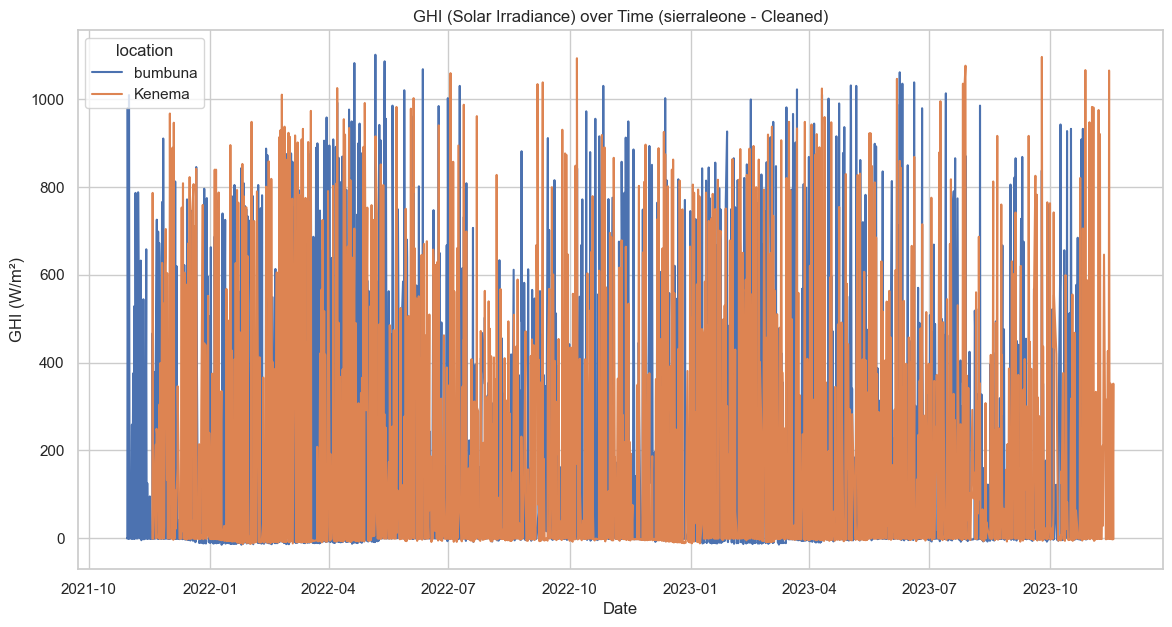

In [5]:
print("Plotting GHI vs. Timestamp...")
plt.figure(figsize=(14, 7))
# Plotting a sample to avoid overcrowding
sns.lineplot(data=df_clean.sample(5000), x='Timestamp', y='GHI', hue='location')
plt.title('GHI (Solar Irradiance) over Time (sierraleone - Cleaned)')
plt.ylabel('GHI (W/m²)')
plt.xlabel('Date')
plt.show()

Plotting cleaning impact...


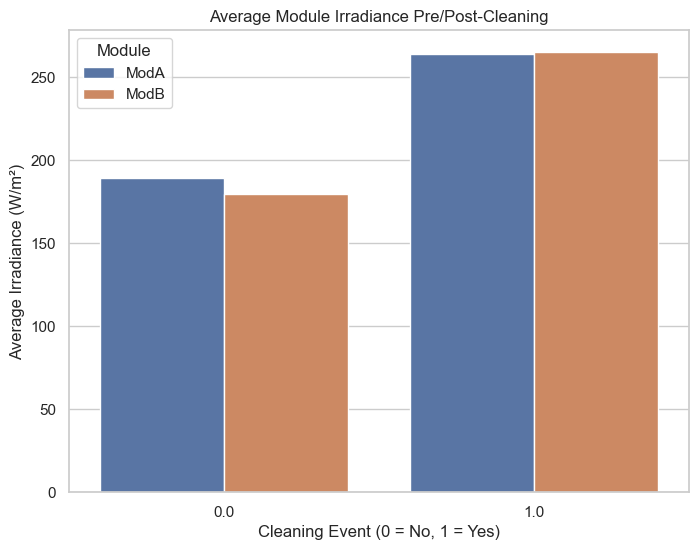

In [6]:
# Check if 'Cleaning' column exists and has data
if 'Cleaning' in df_clean.columns and df_clean['Cleaning'].nunique() > 1:
    print("Plotting cleaning impact...")

    # Group by the Cleaning flag
    cleaning_impact = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

    # Melt the dataframe for easy plotting
    cleaning_impact_melted = cleaning_impact.melt('Cleaning', var_name='Module', value_name='Average Irradiance')

    plt.figure(figsize=(8, 6))
    sns.barplot(data=cleaning_impact_melted, x='Cleaning', y='Average Irradiance', hue='Module')
    plt.title('Average Module Irradiance Pre/Post-Cleaning')
    plt.xlabel('Cleaning Event (0 = No, 1 = Yes)')
    plt.ylabel('Average Irradiance (W/m²)')
    plt.show()
else:
    print("\n'Cleaning' column not suitable for impact analysis (e.g., all 0s or missing).")

Generating correlation heatmap...


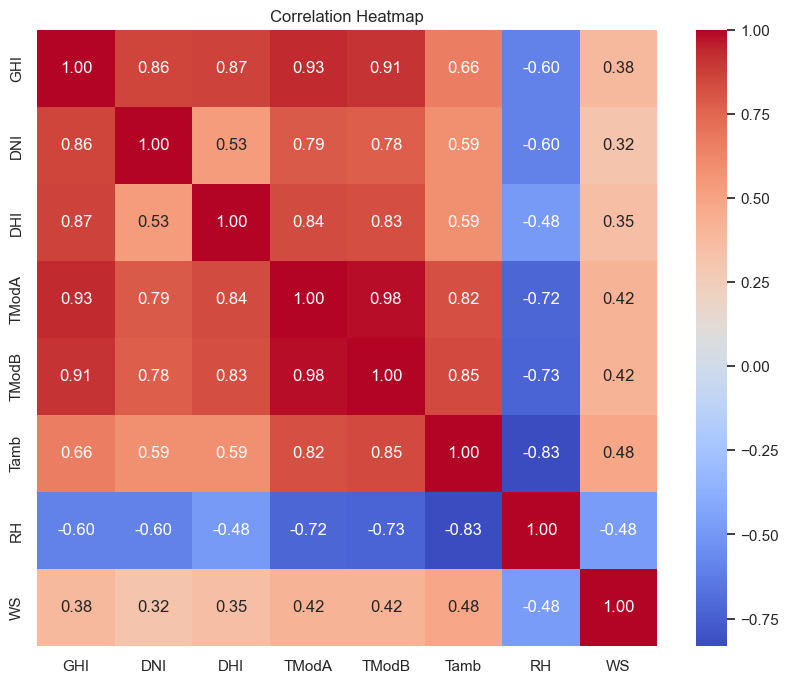

Generating scatter plot: RH vs. Tamb


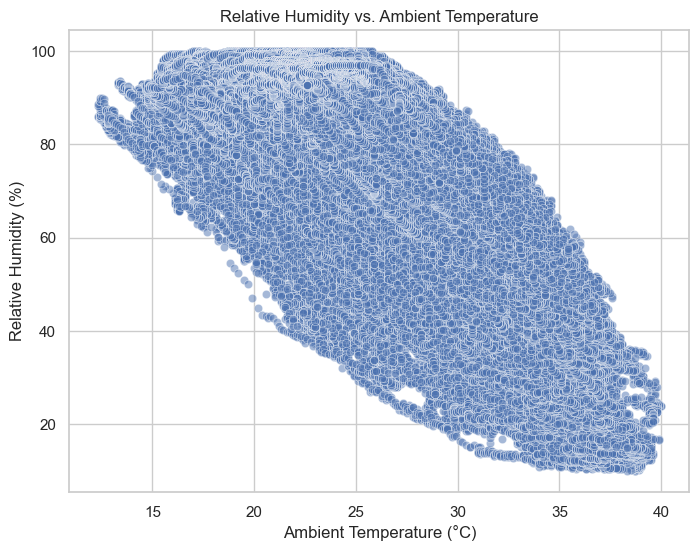

In [7]:
print("Generating correlation heatmap...")
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH', 'WS']
corr_matrix = df_clean[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Required Scatter plot: RH vs. Tamb
print("Generating scatter plot: RH vs. Tamb")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='Tamb', y='RH', alpha=0.5)
plt.title('Relative Humidity vs. Ambient Temperature')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()

Generating histogram for GHI...


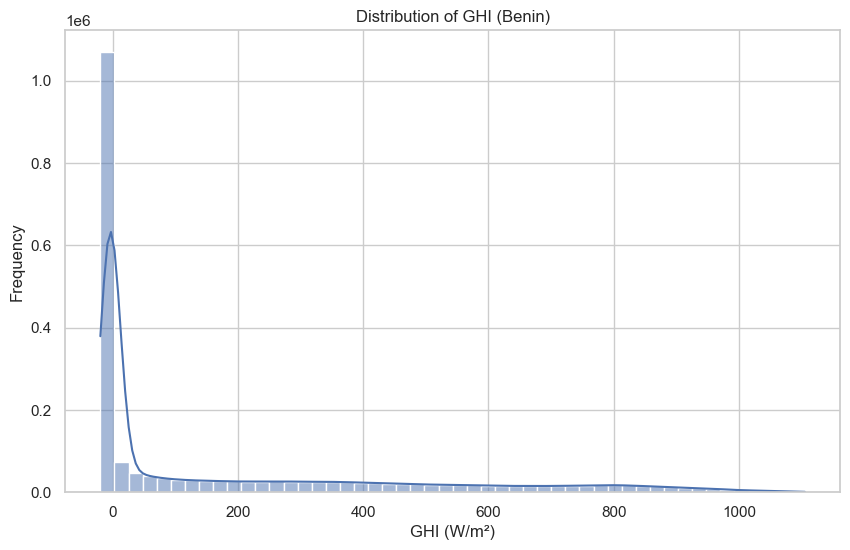

In [8]:
print("Generating histogram for GHI...")
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['GHI'], bins=50, kde=True)
plt.title('Distribution of GHI (Benin)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.show()